In [24]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using CSV, DelimitedFiles, DataFrames, JLD

### Preconditionning std Laplacian with q=0.001

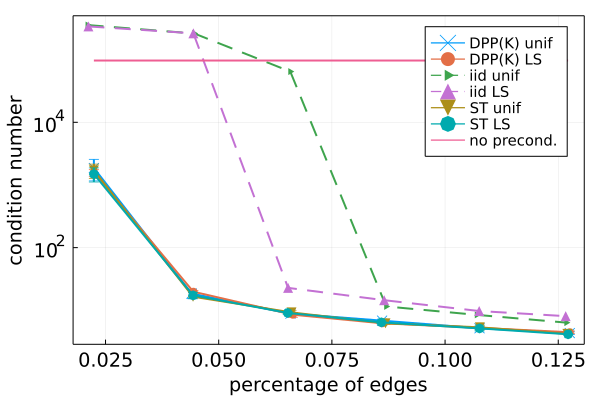

In [27]:
rng = Random.default_rng()

# connection graph parameters
n = 100
p = 0.9
eta = 0.

# regularization parameter
q = 0.001

# simulation parameters
n_batch = 6
n_rep = 3

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple ER graph
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng)
name = "precond"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving results
save("results/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e6)
plot_comparison_cond(D_results,y_limits;legendposition=:topright)

# saving plot
savefig("figures/"*name*".pdf")


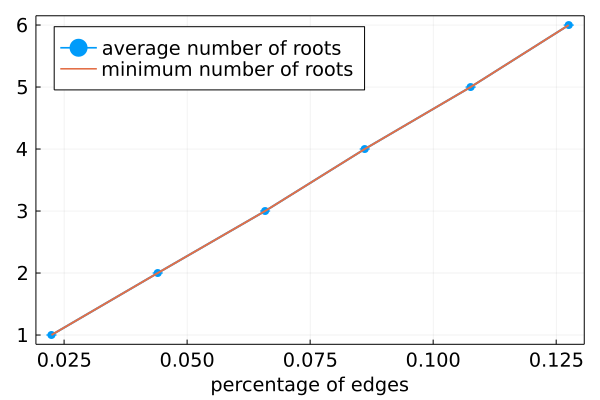

In [29]:
method = "DPP(K) unif"
plot_nb_roots(D_results, method; legendposition=:topleft)

# saving
foldername = "figures/"*name*"_nb_roots"*".pdf"
savefig(foldername)

In [20]:
n = 100
p = 0.9
eta = 0.

rng = Random.default_rng()
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

B = magnetic_incidence(meta_g)
L = B * B'

q = 0.1
n_batch = 6
n_rep = 3
D_all = cond_numbers(meta_g,q,n_batch,n_rep,rng)

Dict{Any, Any} with 6 entries:
  "iid LS"      => Dict{String, Any}("sp_L_std"=>[105.002; 140.032; … ; 80.3513…
  "ST unif"     => Dict{String, Any}("sp_L_std"=>[88.2723; 67.7963; … ; 69.2556…
  "ST LS"       => Dict{String, Any}("sp_L_std"=>[22.5389; 122.049; … ; 110.977…
  "iid unif"    => Dict{String, Any}("sp_L_std"=>[92.2605; 405.041; … ; 47.5219…
  "DPP(K) unif" => Dict{String, Any}("sp_L_std"=>[98.3056; 140.749; … ; 287.594…
  "DPP(K) LS"   => Dict{String, Any}("sp_L_std"=>[18.3576; 153.115; … ; 85.7146…

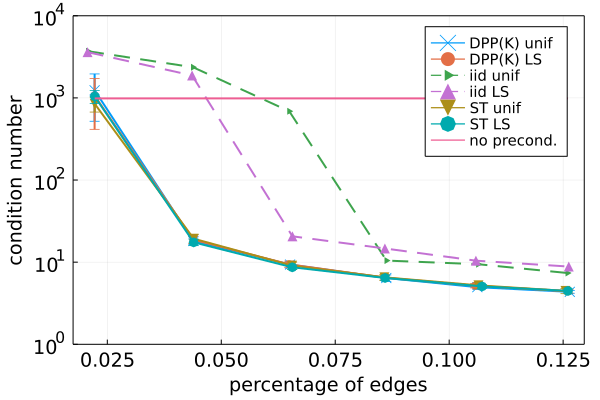

In [7]:
y_limits = (1,1e4)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

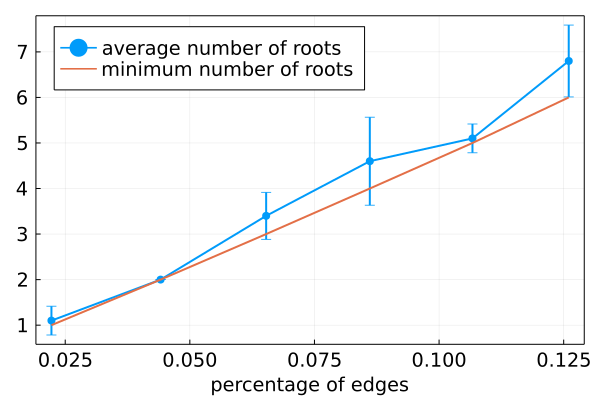

In [9]:
method = "DPP unif"
plot_nb_roots(D_all, method; legendposition=:topleft)

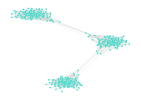

In [91]:
# SBM
q = 0.1

# c = [100 1 1 1;
# 1 100 1 1;
# 1 1 100 1;
# 1 1 1 100]
# n = [150 ; 150; 150; 150]

# c = [100 0.01 ;
# 0.01 20]
# n = [400 ; 400]

# c = [10 0.1 ;
# 0.1 10]
# n = [400 ; 400]

c = [10 0.05 0;
0.05 10 0.05;
0 0.05 10]
n = [100 ; 100; 100]

g =  stochastic_block_model(c, n)
meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

B = magnetic_incidence(meta_g)
L = B * B'

gplot(meta_g)


In [92]:
n_batch = 6
n_rep = 5
D_all = cond_numbers(meta_g,q,n_batch,n_rep,rng)

DPP unif


DPP LS


iid unif


iid LS


UST unif


UST LS


Dict{Any, Any} with 6 entries:
  "DPP unif" => Dict{String, Any}("sp_L_std"=>[22.6782; 216.689; … ; 190.858; 1…
  "iid LS"   => Dict{String, Any}("sp_L_std"=>[128.327; 130.938; … ; 357.913; 2…
  "UST unif" => Dict{String, Any}("sp_L_std"=>[68.0566; 270.97; … ; 198.744; 20…
  "iid unif" => Dict{String, Any}("sp_L_std"=>[184.612; 260.804; … ; 301.526; 3…
  "DPP LS"   => Dict{String, Any}("sp_L_std"=>[47.1402; 358.118; … ; 373.652; 2…
  "UST LS"   => Dict{String, Any}("sp_L_std"=>[146.474; 259.879; … ; 171.389; 2…

In [93]:
l =eigvals(L)
l[1:5]

5-element Vector{Float64}:
 1.1129541076630327e-14
 0.03793657826213835
 0.12206087312465046
 2.6400634276209627
 3.087524705686452

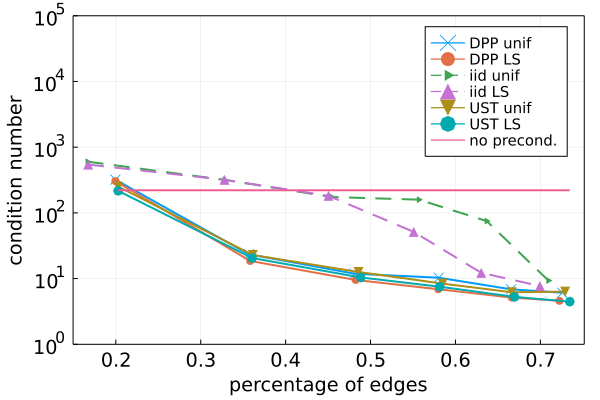

In [94]:
y_limits = (1,1e5)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

In [43]:
y_limits = (1,1e5)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

foldername = "figures/"
name = "SBM_precond"*".pdf"
savefig(foldername*name)

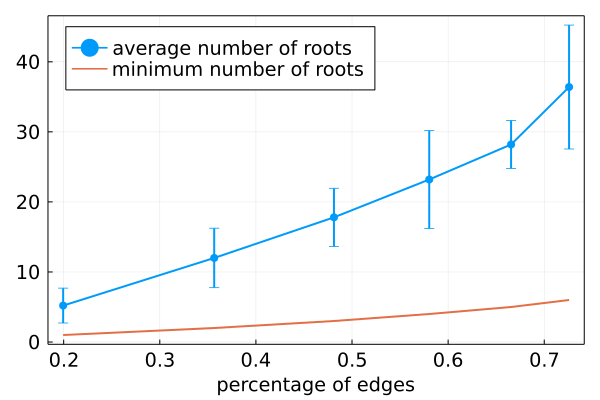

In [95]:
method = "DPP unif"
plot_nb_roots(D_all, method; legendposition=:topleft)

In [45]:
method = "DPP unif"
plot_nb_roots(D_all, method; legendposition=:topleft)
foldername = "figures/"
name = "SBM_precond_roots"*".pdf"
savefig(foldername*name)

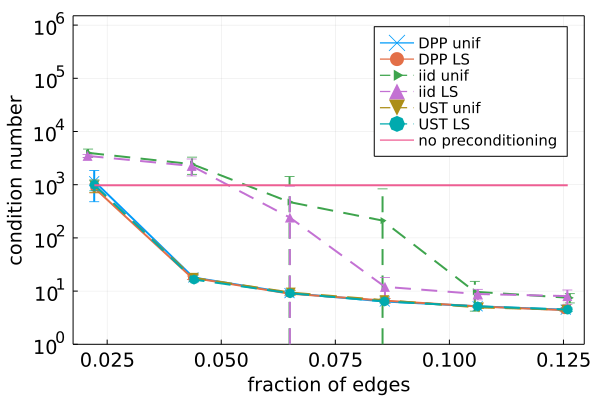

In [32]:
method = "DPP unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot(x,y,
yerror=y_er,
xlabel = "fraction of edges",
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
xtickfont=font(13), 
ytickfont=font(13), 
guidefont=font(13), 
legendfont=font(13),
linewidth=2,
markerstrokewidth=2)

method =  "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method = "iid unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:rtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

method = "iid LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:utriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

method = "UST unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:dtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

method = "UST LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:octagon,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,
labels = "no preconditioning",
ylabel = "condition number",
xtickfontsize=13,
ytickfontsize=13,
xguidefontsize=13,
yguidefontsize=13,
legendfontsize=10,
linewidth=2,
framestyle = :box,
margins = 0.1*2Plots.cm,
markerstrokewidth=2)

ylims!((1e0,1.5*1e6))
yticks!([1,1e1,1e2,1e3,1e4,1e5,1e6])

# foldername = "figures/"
# type = "precond"
# name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
# savefig(foldername*name)

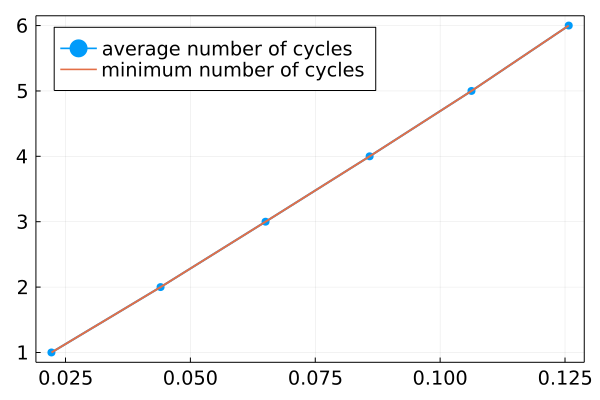

In [17]:
method = "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["roots"]
y_err = D["roots_std"]

legendposition=:topleft
plot(x,y,ribbon=y_err,labels="average number of roots",
markersize=5,
markershape=:circle, 
markerstrokecolor=:auto,
linewidth=2,
markerstrokewidth=2,
xtickfont=font(13),
ytickfont=font(13),
guidefont=font(13),
legendfont=font(13),
framestyle=:box,
margins=0.1 * 2cm)
# baseline
plot!(x,1:n_batch,linewidth=2,labels="minimum number of roots",legend=legendposition)

### Preconditionning std Laplacian with q=0.1

In [18]:
n = 100
p = 0.9
eta = 0.

mm = Length(:mm, 1)

rng = Random.default_rng();
meta_g = gen_graph_mun(rng, n, p, eta);
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

q = 0.1
D_all = cond_numbers(meta_g,q,n_tot,n_rep,rng);


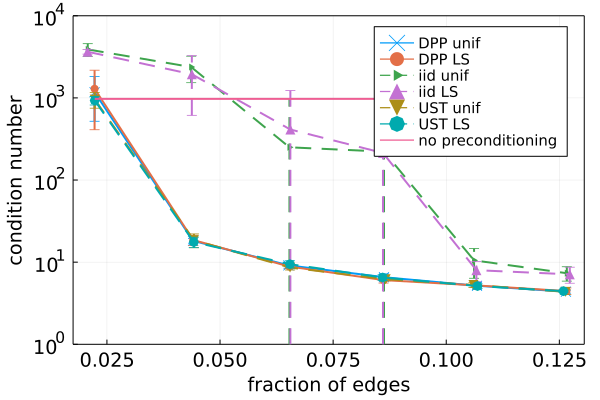

In [19]:

method = "DPP unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]


plot(x,y,yerror=y_er,
xlabel = "fraction of edges",
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2)


method = "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method = "iid unif"
D = D_all[method]
x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]


plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:rtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

method = "iid LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]


plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:utriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)


method = "UST unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:dtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

method = "UST LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]

plot!(x,y,
yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:octagon,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,
labels = "no preconditioning",
ylabel = "condition number",
xtickfontsize=13,
ytickfontsize=13,
xguidefontsize=13,
yguidefontsize=13,
legendfontsize=10, 
framestyle = :box,
margins = 0.1*2Plots.cm,
linewidth=2,
markerstrokewidth=2)
ylims!((1e0,1e4))

# foldername = "figures/"
# type = "precond"
# name = type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)*".pdf"
# savefig(foldername*name)

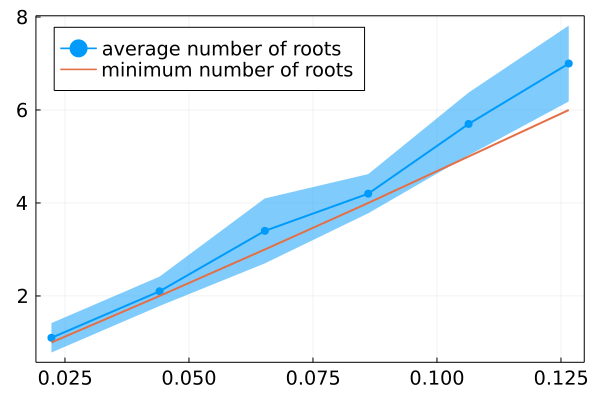

In [20]:
method = "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["roots"]
y_err = D["roots_std"]

legendposition=:topleft
plot(x,y,ribbon=y_err,labels="average number of roots",
markersize=5,
markershape=:circle, 
markerstrokecolor=:auto,
linewidth=2,
markerstrokewidth=2,
xtickfont=font(13),
ytickfont=font(13),
guidefont=font(13),
legendfont=font(13),
framestyle=:box,
margins=0.1 * 2cm)
# baseline
plot!(x,1:n_batch,linewidth=2,labels="minimum number of roots",legend=legendposition)

## Same graph but with non-trivial bundle

In [14]:
q = 0.1;

n = 100
p = 0.9
eta = 0.1
meta_g = gen_graph_mun(rng, n, p, eta);

D_all = cond_numbers(meta_g,q,n_tot,n_rep,rng);

In [15]:
q = 0.001;

n = 100
p = 0.9
eta = 0.1
meta_g = gen_graph_mun(rng, n, p, eta);

D = cond_numbers(meta_g,q,n_tot,n_rep,rng);

### SBM

In [25]:
c = [50 10;
10 50]
n = [100 ; 100]
g =  stochastic_block_model(c, n)
meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

q = 0.001;
D = cond_numbers(meta_g,q,n_tot,n_rep,rng);